
# Nonlinearities in Regression

In this section, we will explore the concept of nonlinearities in regression models. While linear regression is a powerful tool for modeling relationships between variables, it has limitations when it comes to capturing complex relationships in data. Nonlinear regression models can help address this limitation by allowing for more flexible relationships between the independent and dependent variables.

Nonlinear regression models can take various forms, including **polynomial regression**, **exponential regression**, and **logarithmic regression**. These models can capture relationships that are not well represented by a straight line, allowing for a more accurate representation of the underlying data.

## Types of Nonlinear Regression Models

-   **Polynomial Regression**: This model fits a polynomial equation to the data, allowing for curves and bends in the relationship between the independent and dependent variables. The degree of the polynomial can be adjusted to capture more complex relationships.
-   **Exponential Regression**: This model fits an exponential function to the data, which is useful for modeling relationships where the rate of change increases or decreases exponentially.
-   **Logarithmic Regression**: This model fits a logarithmic function to the data, which is useful for modeling relationships where the rate of change decreases as the independent variable increases.

## Practical Demonstration

In this section, we will demonstrate how to implement nonlinear regression models using Python's `scikit-learn` library. We will use a synthetic dataset to illustrate the concepts of polynomial regression, exponential regression, and logarithmic regression. We will also explore how to evaluate the performance of these models using metrics such as Mean Squared Error (MSE) and R-squared ($R^2$) score.

Let's start by generating a synthetic dataset that exhibits a nonlinear relationship between the independent variable ($X$) and the dependent variable ($y$). We will then fit a polynomial regression model to this data and visualize the results.

-   Generate Synthetic Data with the following mathematical relationship:$$y = 3X^2 + 8 + \epsilon$$ where $\epsilon$ is a normally distributed error term.

In [1]:
import numpy as np
import pandas as pd

n_samples = 100
np.random.seed(42)
X = np.linspace(-3, 3, n_samples).reshape(-1, 1)  # Independent variable
y = 3 * X**2 + 8 + 1.0 * np.random.randn(100, 1)  # Dependent variable with noise

data = pd.DataFrame(np.hstack((X, y)), columns=['X', 'y'])

-   Exploratory Data Analysis (EDA)

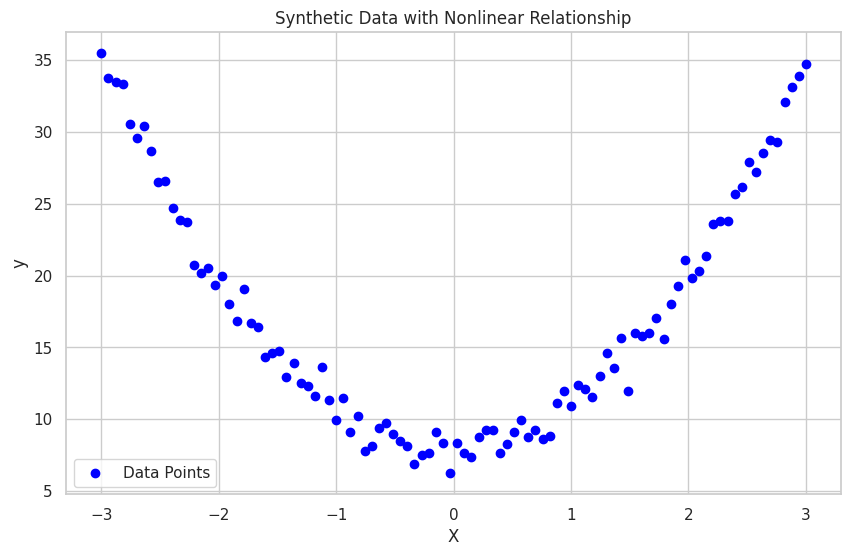

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
plt.scatter(data['X'], data['y'], color='blue', label='Data Points')
plt.title('Synthetic Data with Nonlinear Relationship')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

-   Train a Simple Linear Regression Model

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['X']], data['y'], test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

print(f"Linear Regression Coefficients: {linear_model.coef_}")
print(f"Linear Regression Intercept: {linear_model.intercept_}")

Linear Regression Coefficients: [0.35997096]
Linear Regression Intercept: 17.055287073961274


-   Make Predictions and Evaluate the Linear Regression Model

Linear Regression Mean Squared Error (MSE): 61.11
Linear Regression R-squared (R^2): -0.06


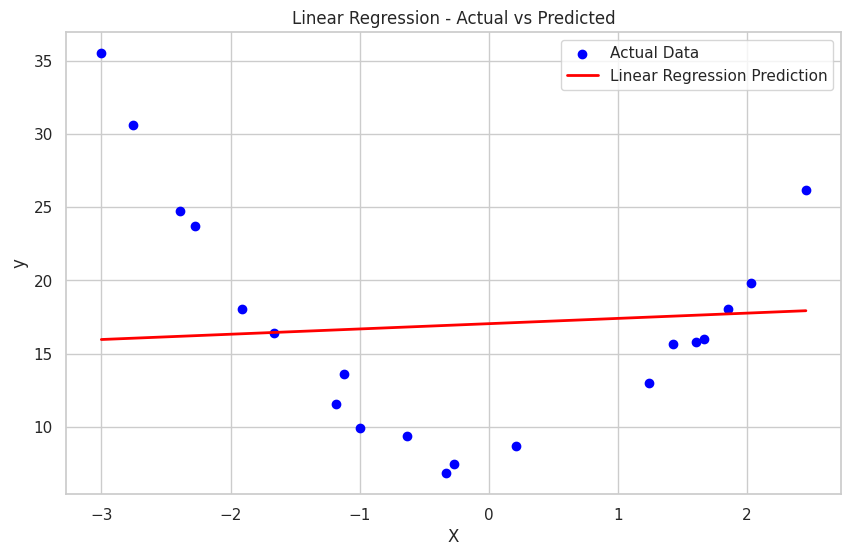

In [4]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_linear = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"Linear Regression R-squared (R^2): {r2_linear:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
sns.lineplot(x=X_test.squeeze(), y=y_pred_linear, color='red', label='Linear Regression Prediction', linewidth=2)
plt.title('Linear Regression - Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

The linear regression model does not fit the data well, as expected, since the relationship is nonlinear. Now, let's fit a polynomial regression model to capture the nonlinear relationship.

-   Train a Polynomial Regression Model

In [5]:
from sklearn.preprocessing import PolynomialFeatures

degree = 2  # Degree of the polynomial
polynomial_features = PolynomialFeatures(degree=degree)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.transform(X_test)

polynomial_model = LinearRegression()
polynomial_model.fit(X_train_poly, y_train)
print(f"Polynomial Regression Coefficients: {polynomial_model.coef_}")

Polynomial Regression Coefficients: [0.         0.01783482 3.02035046]


-   Make Predictions and Evaluate the Polynomial Regression Model

Polynomial Regression Mean Squared Error (MSE): 0.62
Polynomial Regression R-squared (R^2): 0.99


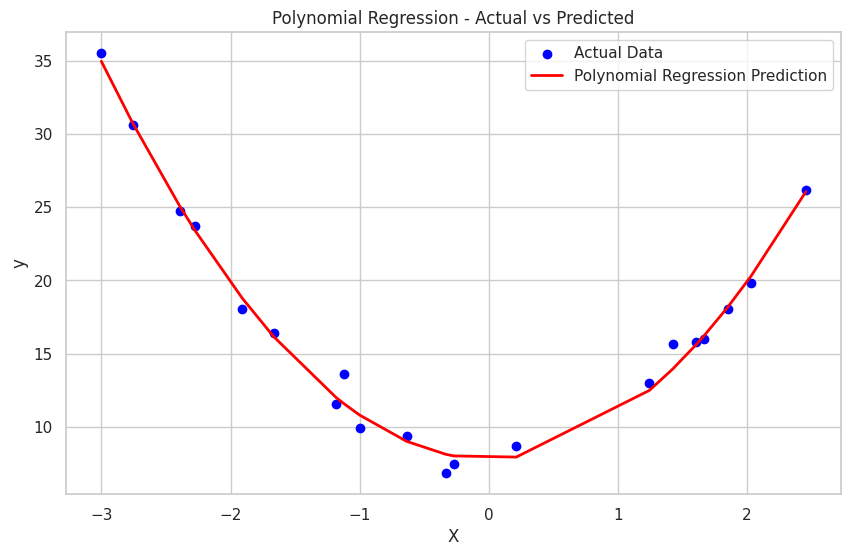

In [6]:
y_pred_poly = polynomial_model.predict(X_test_poly)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression Mean Squared Error (MSE): {mse_poly:.2f}")
print(f"Polynomial Regression R-squared (R^2): {r2_poly:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
sns.lineplot(x=X_test.squeeze(), y=y_pred_poly, color='red', label='Polynomial Regression Prediction', linewidth=2)
plt.title('Polynomial Regression - Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## Hands-on Exercises

-   Generate Synthetic Data with a Polynomial Relationship:$$y = X^3 + 3X + \epsilon$$ where $\epsilon$ is a normally distributed error term.

In [7]:
n_samples = 100
np.random.seed(42)
X = np.linspace(-5, 5, n_samples).reshape(-1, 1)  # Independent variable
y = X**3 + 3.0 * X + 1.0 * np.random.randn(100, 1)  # Dependent variable with noise

df = pd.DataFrame(np.hstack((X, y)), columns=['X', 'y'])

-   Exploratory Data Analysis (EDA)

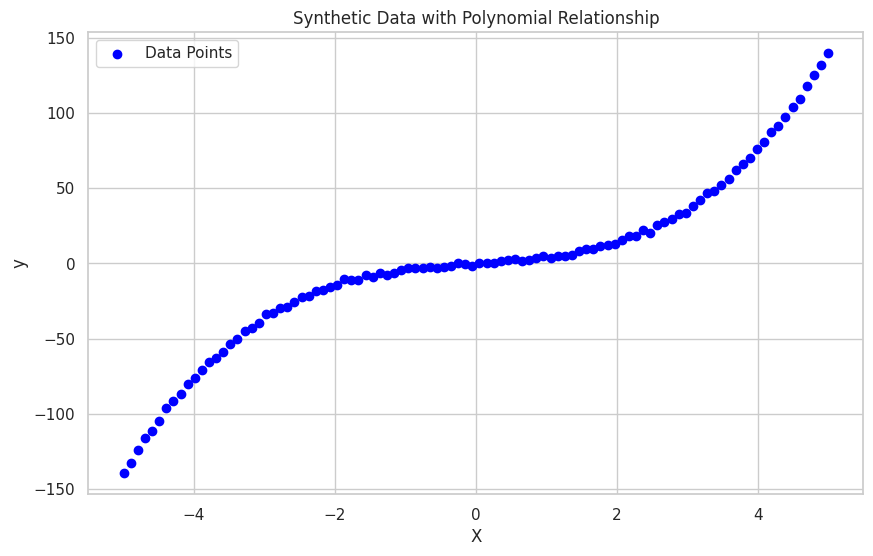

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(df['X'], df['y'], color='blue', label='Data Points')
plt.title('Synthetic Data with Polynomial Relationship')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

-   Split the Data into Training and Testing Sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df[['X']], df['y'], test_size=0.2, random_state=42)
print(f"Training set size: {len(X_train)}, Testing set size: {len(X_test)}")

Training set size: 80, Testing set size: 20


-   Train a Simple Linear Regression Model

In [10]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

print(f"Linear Regression Coefficients: {linear_model.coef_}")
print(f"Linear Regression Intercept: {linear_model.intercept_}")

Linear Regression Coefficients: [18.57974736]
Linear Regression Intercept: 0.5956463511219252


-   Make Predictions and Evaluate the Linear Regression Model

Linear Regression Mean Squared Error (MSE): 407.78
Linear Regression R-squared (R^2): 0.85


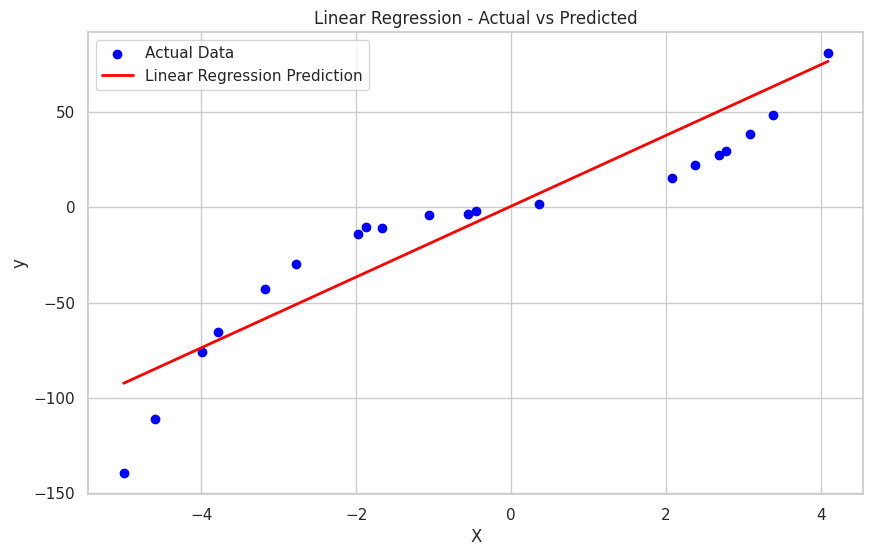

In [11]:
y_pred_linear = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"Linear Regression R-squared (R^2): {r2_linear:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
sns.lineplot(x=X_test.squeeze(), y=y_pred_linear, color='red', label='Linear Regression Prediction', linewidth=2)
plt.title('Linear Regression - Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

-   Train a Polynomial Regression Model

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
degree = 3  # Degree of the polynomial
polynomial_features = PolynomialFeatures(degree=degree)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.transform(X_test)

polynomial_model = Lasso(alpha=0.1)  # Using Lasso for regularization
polynomial_model.fit(X_train_poly, y_train)
print(f"Polynomial Regression Coefficients: {polynomial_model.coef_}")

Polynomial Regression Coefficients: [0.         3.10858311 0.00805488 0.99296385]


-   Make Predictions and Evaluate the Polynomial Regression Model

Polynomial Regression Mean Squared Error (MSE): 0.60
Polynomial Regression R-squared (R^2): 1.00


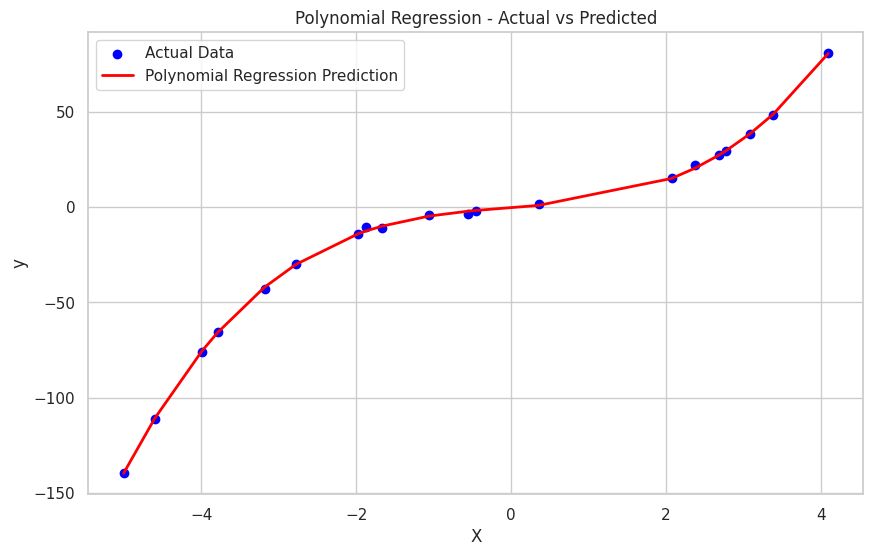

In [13]:
y_pred_poly = polynomial_model.predict(X_test_poly)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression Mean Squared Error (MSE): {mse_poly:.2f}")
print(f"Polynomial Regression R-squared (R^2): {r2_poly:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
sns.lineplot(x=X_test.squeeze(), y=y_pred_poly, color='red', label='Polynomial Regression Prediction', linewidth=2)
plt.title('Polynomial Regression - Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()